<a href="https://colab.research.google.com/github/praveenbejo95/Cardiovascular-risk-prediction-ML-classification-project/blob/main/cardiovascular_Risk_prediction(Pravin_notebook).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Heart disease is one the major cause of moribity and mortality globally. A heart attack happens when the flow of oxygen-rich blood to a section of heart muscle suddenly becomes blocked and the heart can’t get oxygen. If blood flow isn’t restored quickly, the section of heart muscle begins to die.

Doctors and Scientists across the globe have started to look into Machine Learning Techniques to develop screening tools.

## **Objective:**

In this project, we shall be giving you a walk through on the development of a screening tool for predicting whether a patient has a 10-year risk of developing coronary heart disease (CHD) based on their present health conditions using different Machine Learning Techniques.

## **Description of Given Dataset:**

## **Features description**
**Breakdown of Our Features:**

* **Sex: male or female("M" or "F")**

* **Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral**

* **is_smoking: whether or not the patient is a current smoker ("YES" or "NO")**

* **Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)**

* **BP Meds: whether or not the patient was on blood pressure medication (Nominal)**

* **Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)**

* **Prevalent Hyp: whether or not the patient was hypertensive (Nominal)**

* **Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)**

* **Tot Chol: total cholesterol level (Continuous)**

* **Sys BP: systolic blood pressure (Continuous)**

* **Dia BP: diastolic blood pressure (Continuous)**

* **BMI: Body Mass Index (Continuous)**

* **Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)**

* **Glucose: glucose level (Continuous)**

Predict variable (desired target)

* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV**

In [315]:
# Importing required libraries

import numpy as np
import pandas as pd
from numpy import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [316]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [317]:
path = '/content/drive/MyDrive/Colab Notebooks/3rd ML (classification) project/data_cardiovascular_risk.csv'

In [318]:
# Loading the csv File

df = pd.read_csv(path)
df.head() # head of the data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [319]:
df.shape #Looking at the shape of the dataset

(3390, 17)

In [320]:
df.info()  #checks the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## **Preprocessing the dataset**

**Why do we need to handle missing values?**

* **The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first**

In [321]:
#Let's count how many missing values we have

df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**It shows the number of np.nan or null values or missing values are present in the dataset**

## **Duplicate values**

**Why is it important to remove duplicate records from my data?**

* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.**

In [322]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0



**It shows that there are no Duplicated Values present in the dataset.**

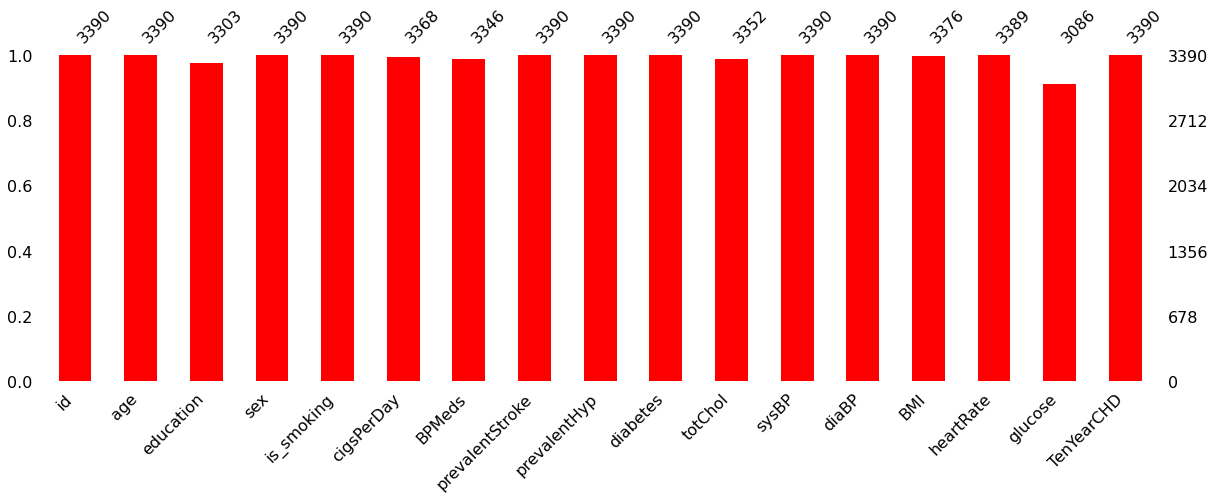

In [323]:
#Visualize missing data

import missingno as mn #this library shows the null values in a graph
mn.bar(df,figsize = (20,6),color = 'red')

In [324]:
# Let us check the majority and minority set of the target variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

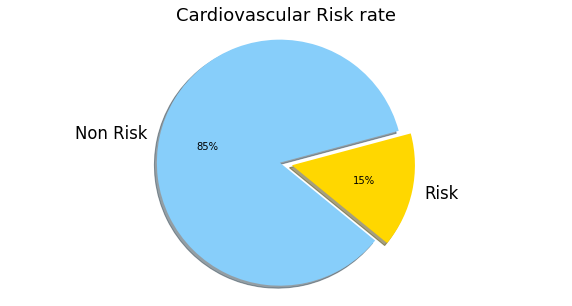

In [325]:
# Let us plot the majority and minority set of the target variable
labels = 'Non Risk',"Risk"
my_colors = ['lightskyblue','gold']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()

**85% people - No Risk - Majority Class**

**15% people - Risk - Minority Class**

## **Data Cleaning**

### **Handling NaN values**

In [326]:
# Let us drop the ID column as it is unique and not of much use for this analysis.
df.drop('id',axis=1,inplace=True)

In [327]:
# Let us check the new shape
df.shape

(3390, 16)

In [328]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [329]:
# Total NaN values
(df.isnull().sum()).sum()

510

In [330]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [331]:
# Let us check if any of the NaN values belong to the minority class
print(f'Education:total NaN value is = {df.education.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.education.isnull())].shape}')
print(f'cigsPerDay:total NaN value is = {df.cigsPerDay.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.cigsPerDay.isnull())].shape}')
print(f'BPMeds:total NaN value is = {df.BPMeds.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.BPMeds.isnull())].shape}')
print(f'totChol:total NaN value is = {df.totChol.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.totChol.isnull())].shape}')
print(f'BMI:total NaN value is = {df.BMI.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.BMI.isnull())].shape}')
print(f'heartRate:total NaN value is = {df.heartRate.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.heartRate.isnull())].shape}')
print(f'glucose:total NaN value is = {df.glucose.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.glucose.isnull())].shape}')



Education:total NaN value is = 87, MinorityNaN count = (13, 16)
cigsPerDay:total NaN value is = 22, MinorityNaN count = (1, 16)
BPMeds:total NaN value is = 44, MinorityNaN count = (7, 16)
totChol:total NaN value is = 38, MinorityNaN count = (7, 16)
BMI:total NaN value is = 14, MinorityNaN count = (7, 16)
heartRate:total NaN value is = 1, MinorityNaN count = (1, 16)
glucose:total NaN value is = 304, MinorityNaN count = (39, 16)


Simplest way to infer the above data is as below#


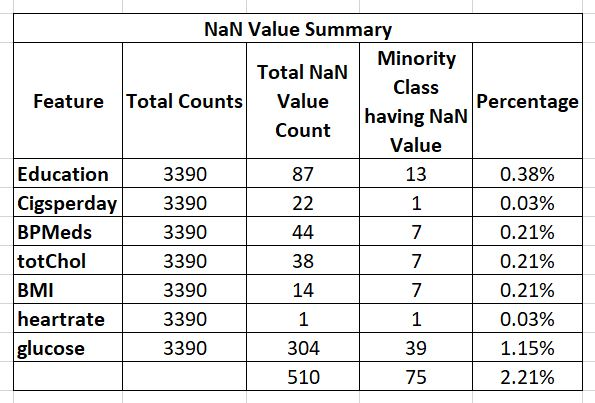

**Dropping the NaN values will lead to 2.21% loss of the minority set, which is already at 15%. Let us impute values to these, so that we don't loose the minority class data.**

**KNNImputer** shall be used to impute the NaN values for continuous data.

**SimpleImputer** shall be used to impute the NaN values for categorical data.

**missing_value_continuous** function to handle missing values of continuous data.

**variables missing_value_categorical** function to handle missing values of categorical data.

In [332]:
# Identify the categorical and numerical columns to check the data distribution

column_datatypes= df.drop("TenYearCHD",axis=1).dtypes
categorical_columns=list(column_datatypes[column_datatypes=="object"].index.values)
continous_columns=list(column_datatypes[(column_datatypes=="int64") | (column_datatypes=="float64") ].index.values)

In [333]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [334]:
class Data_preprocessing:
  def __init__(self,train_data):
        self.train_data = train_data

  def missing_value_continous(self,columns_with_specific_type,neighbors=2):
    knn_imputer= KNNImputer(n_neighbors=neighbors)

    knn_imputer.fit(self.train_data[columns_with_specific_type])
    self.train_data[columns_with_specific_type]= knn_imputer.transform(self.train_data[columns_with_specific_type])
    return self.train_data

  def missing_value_categorical(self,columns_with_specific_type,imputation_type="most_frequent"):
   most_frequent= SimpleImputer(strategy="most_frequent")
   most_frequent.fit(self.train_data[columns_with_specific_type])
   self.train_data[columns_with_specific_type]= most_frequent.transform(self.train_data[columns_with_specific_type])
   return self.train_data

In [335]:
dlist= [df]
for df in dlist:
  #create class object
  dat= Data_preprocessing(df)
  df= dat.missing_value_continous(continous_columns)
  df= dat.missing_value_categorical(categorical_columns)

In [336]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## **Outlier Treatment**

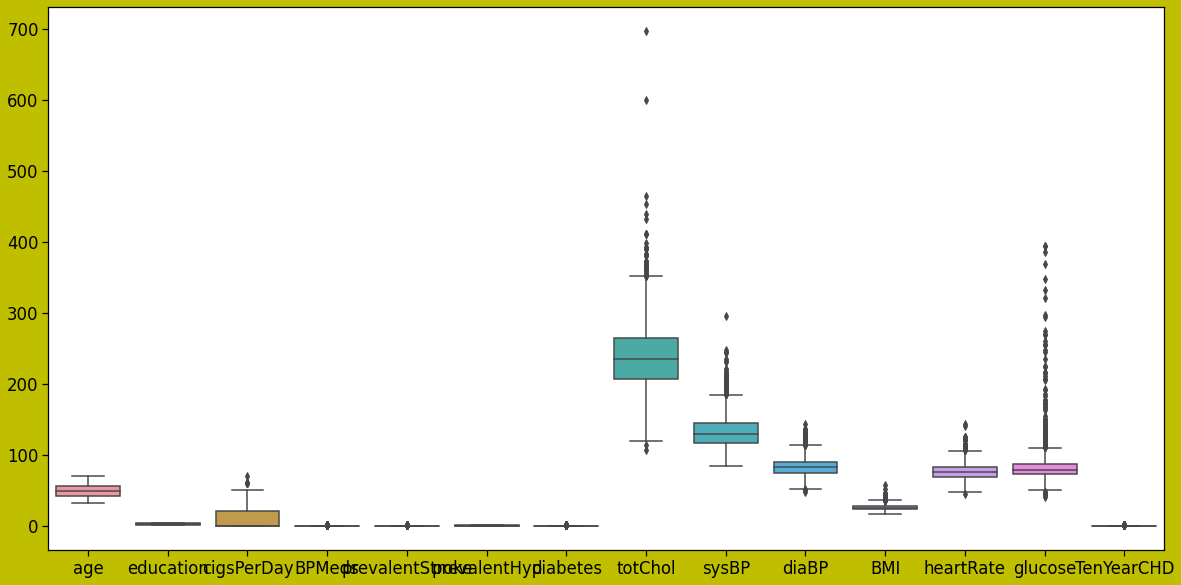

In [337]:
plt.figure(figsize=(20,10), facecolor='y')
sns.boxplot(data=df)
plt.show()

**Outliers are important here and we simply cannot remove them because there could be a possibility that a person might have a high risk and removing it, would lead to ignorance of the same. This would further affect the machine learning model.**

In [338]:
print(df.totChol.min())
print(df.totChol.max())
print(df.totChol.mean())

107.0
696.0
237.01533923303836


**We can clearly see higher value (i.e. 600) in the Totalchol in the box plot. This is now being replaced with average value for the ease of analysis purpose.**

In [339]:
# We replaced 600 with 500 because we are focusing on people having risk of heart disease in future.
df['totChol'] = df['totChol'].replace(600.0,500.0)

In [340]:
# Let us check
df.loc[420:425,:]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
420,40.0,2.0,F,YES,20.0,0.0,0.0,0.0,0.0,165.0,101.0,59.0,23.06,60.0,76.0,0
421,50.0,1.0,F,NO,0.0,0.0,0.0,0.0,0.0,281.0,107.5,74.0,23.44,85.0,79.0,0
422,55.0,1.0,F,YES,4.5,0.0,0.0,1.0,0.0,213.0,163.0,91.0,28.66,69.0,66.0,0
423,52.0,2.0,F,NO,0.0,0.0,0.0,1.0,1.0,500.0,159.5,94.0,28.27,78.0,140.0,1
424,48.0,2.0,F,NO,0.0,0.0,0.0,0.0,0.0,237.0,124.5,66.5,33.29,80.0,91.0,0
425,43.0,4.0,M,YES,20.0,0.0,0.0,0.0,0.0,187.0,129.5,88.0,25.62,80.0,75.0,0


**Finally the data cleaning part is done with handling NaN values and outlier treatment.**

## **Feature Engineering**

### **One Hot Encoding**
Let us know focus on converting the categorical columns into numbers which can be read by the algorithms.

We have two features i.e.

**1. sex - Male(M)/Female(F) which needs to be converted to 1 / 0**

**2. is_smoking - YES/NO which needs to be converted to 1 / 0**

In [341]:
# One Hot Encoding to the variables- SEX and IS_SMOKING:
# binary encoding
df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [342]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,31.47,90.0,80.0,1
1,36.0,4.0,1,0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0


## **Co-relation of features**

In [343]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [344]:
# Let us divide the given columns into continous and discrete
continous_columns_list = ['age','cigsPerDay', 'totChol','sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
discrete_columns_list = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']

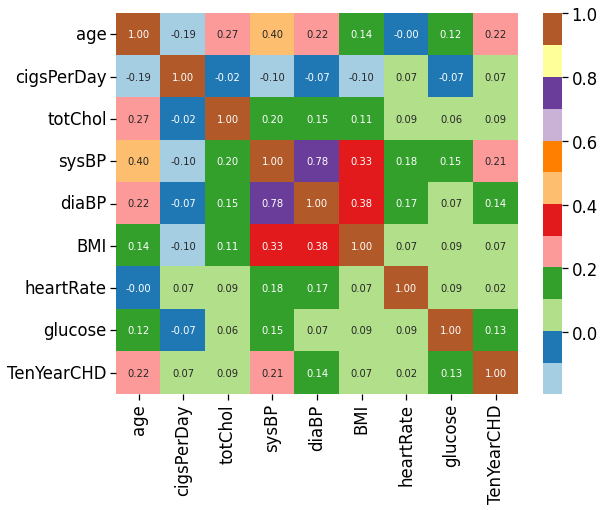

In [345]:
cont_col = continous_columns_list.copy() 
#correlation matrix between numerical variables and RISK of getting heart disease
cont_col.append('TenYearCHD')
plt.figure(figsize=(9,7))
g= sns.heatmap(df[cont_col].corr(),annot=True,fmt='.2f',cmap= 'Paired')

* sysBP & diaBP are co-related to each other. The co-relation is **0.78.**

* sysBP & TenYearCHD has a co-relation of **0.21.**

* diaBP & TenYearCHD has a co-relation of **0.14.**

**For a healthy human, the BP is 120/80.**

Let us derive a new feature i.e. avgBP which would be defined by the below formula

**avgBP = (sysBP + diaBP)/2**

In [346]:
df["avgBP"]= round((df["sysBP"]+df["diaBP"])/2,2)

In [347]:
# Let us check the co-relation of avgBP and TenYearCHD
df["avgBP"].corr(df["TenYearCHD"])

0.1957935000660334

In [348]:
# Since avgBP has been added, we can now remove sysBP & diaBP
df.drop("sysBP",axis=1,inplace=True)
df.drop("diaBP",axis=1,inplace=True)

In [349]:
cont_col = ['age',
 'cigsPerDay',
 'totChol',
 'avgBP',
 'BMI',
 'heartRate',
 'glucose']

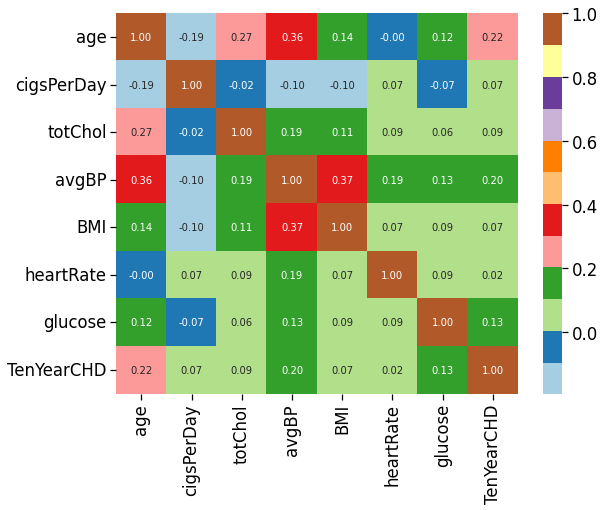

In [350]:
#correlation matrix between numerical variables and RISK of getting heart disease
cont_col.extend(['TenYearCHD'])
plt.figure(figsize=(9,7))
g= sns.heatmap(df[cont_col].corr(),annot=True,fmt='.2f',cmap='Paired')

In [351]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
0,64.0,2.0,0,1,3.0,0.0,0.0,0.0,0.0,221.0,31.47,90.0,80.0,1,116.50
1,36.0,4.0,1,0,0.0,0.0,0.0,1.0,0.0,212.0,29.77,72.0,75.0,0,133.00
2,46.0,1.0,0,1,10.0,0.0,0.0,0.0,0.0,250.0,20.35,88.0,94.0,0,93.50
3,50.0,1.0,1,1,20.0,0.0,0.0,1.0,0.0,233.0,28.26,68.0,94.0,1,123.00
4,64.0,1.0,0,1,30.0,0.0,0.0,0.0,0.0,241.0,26.42,70.0,77.0,0,110.75


## **Performing EDA on the dataset**

**Why do we perform EDA?**

* **An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.**

## **EDA - Feature Analysis**

In [352]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'avgBP'],
      dtype='object')

In [353]:
continous_columns_list = ['age','cigsPerDay', 'totChol','avgBP','BMI', 'heartRate', 'glucose']
discrete_columns_list = ['education','BPMeds','sex','is_smoking','prevalentStroke','prevalentHyp','diabetes']

## **EDA - Feature Analysis on Continuous Features**

<Figure size 720x432 with 0 Axes>

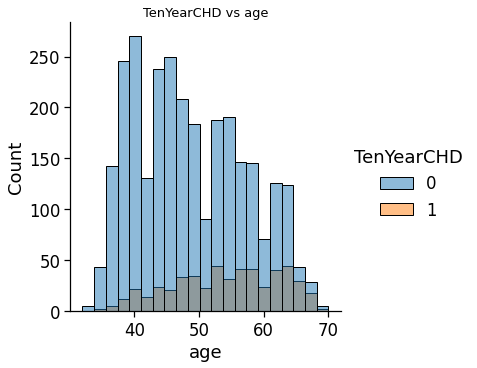

<Figure size 720x432 with 0 Axes>

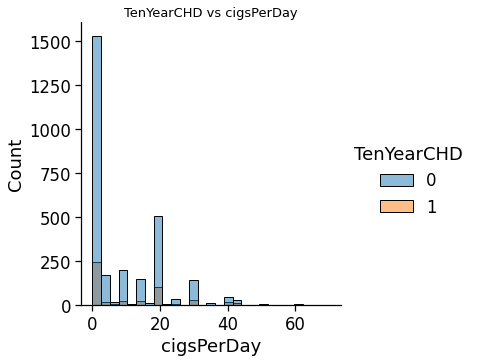

<Figure size 720x432 with 0 Axes>

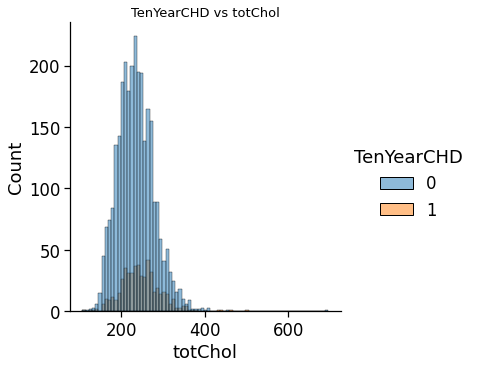

<Figure size 720x432 with 0 Axes>

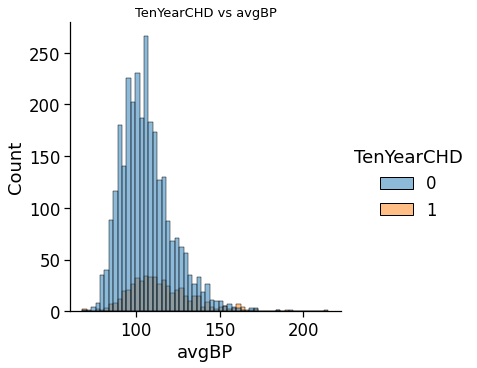

<Figure size 720x432 with 0 Axes>

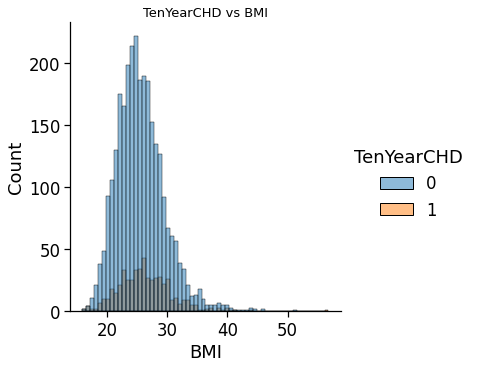

<Figure size 720x432 with 0 Axes>

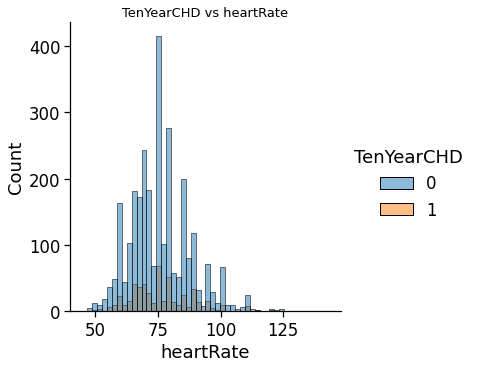

<Figure size 720x432 with 0 Axes>

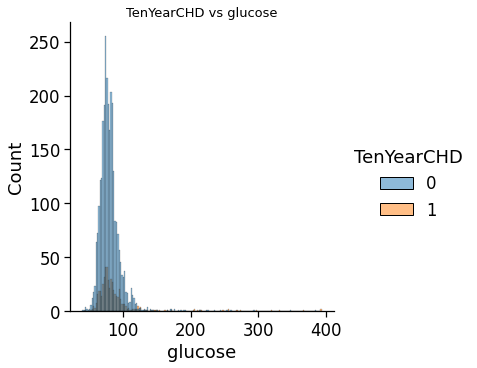

In [354]:
for a, b in enumerate(continous_columns_list):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=b, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {b}', fontsize=13)
  plt.show()

## **Inference:**

**1. Glucose slightly shows a bit of right skewness. But since we are concerned about people with cardiovascular issues we consider the right skewed values as an important information so we left it as it is.**

**2. cigsPerDay is not following Gaussian/Normal distribution and from the dist plot as well as the kde plot we did not get any inference w.r.t target variable.**

## **EDA - Feature Analysis on Discrete Features**

<Figure size 720x432 with 0 Axes>

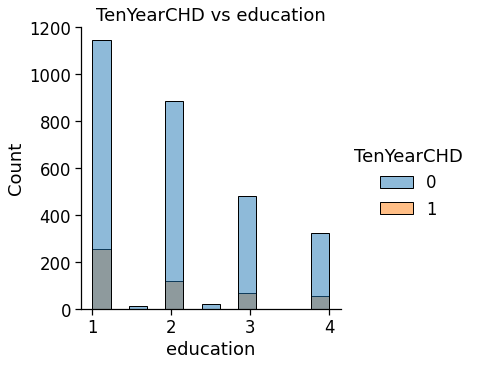

<Figure size 720x432 with 0 Axes>

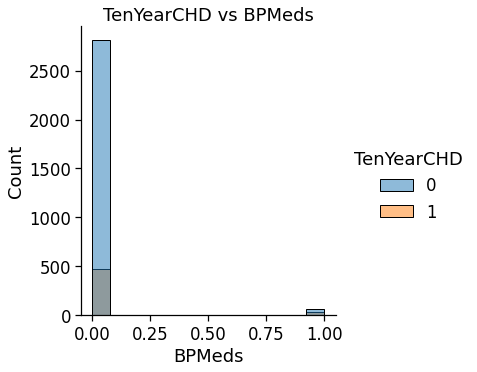

<Figure size 720x432 with 0 Axes>

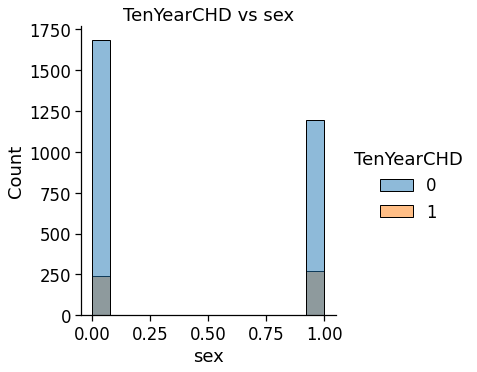

<Figure size 720x432 with 0 Axes>

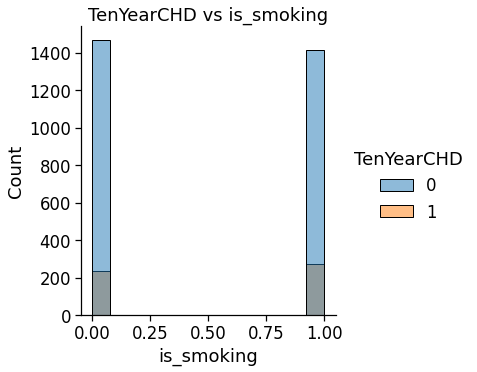

<Figure size 720x432 with 0 Axes>

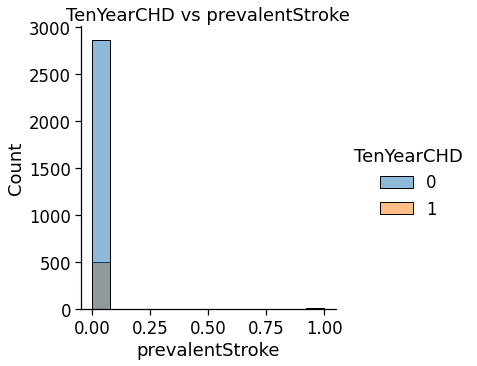

<Figure size 720x432 with 0 Axes>

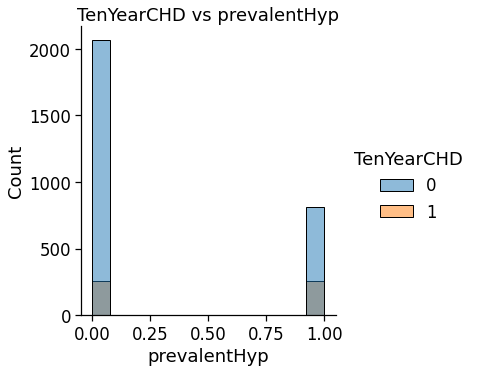

<Figure size 720x432 with 0 Axes>

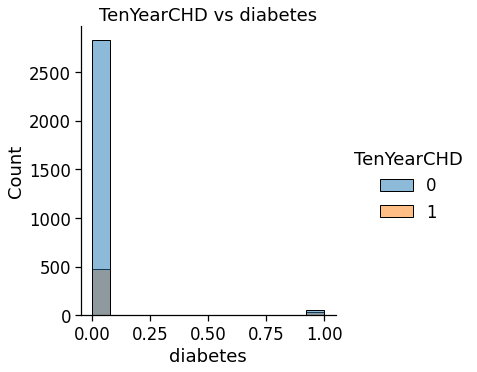

In [355]:
# Dependent variable vs categorical features
for a, b in enumerate(discrete_columns_list):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=b, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {b}')
  plt.show()

## **Inference:**

**1. Education is important, as it is evident that if people are aware, they take care and precautions in order to avoid the risk of CHD.**

**2. BPMeds, Prevalentstroke, diabetes have very low variance, thus we are unable to come up with any generalized conclusion about the co-relation between their history and prevalence of cardiovascular risk.**

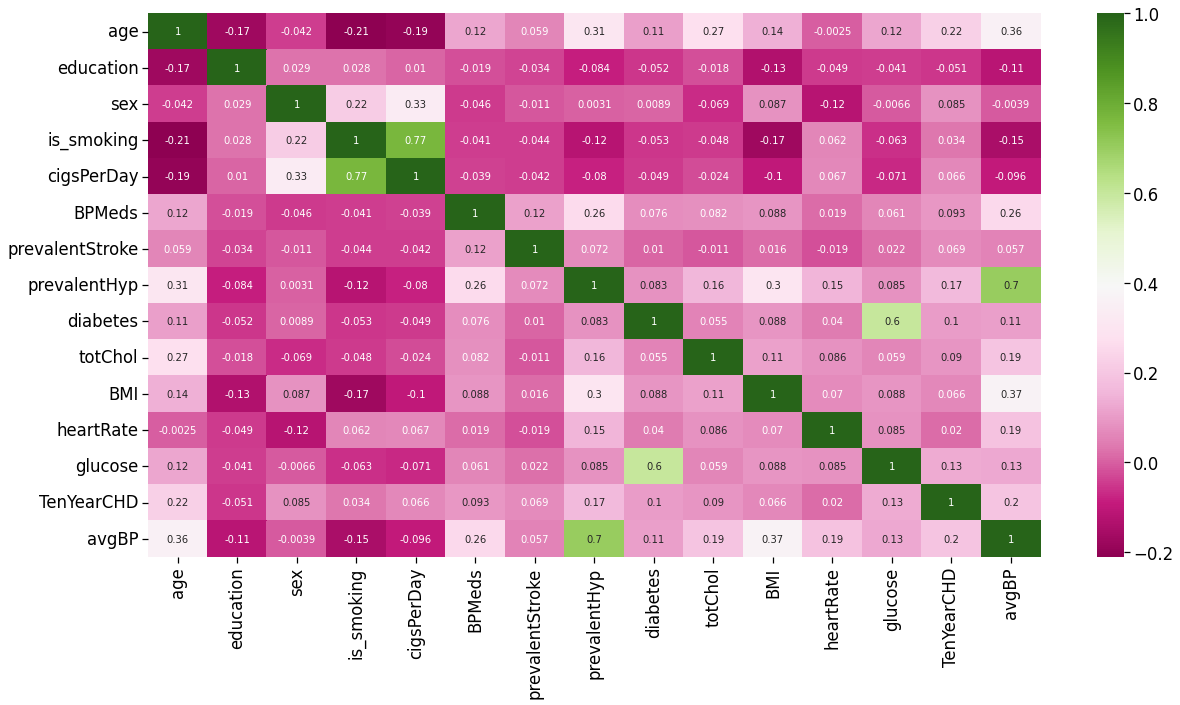

In [356]:
#Bivariate Analysis: Corelation Matrix
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='PiYG')

## **Inference:**

* **It is evident from the above graph that the features having low variance i.e., BPMeds, Prevalentstroke, diabetes do not have any direct or good linear relationship with the target variable(TenYearCHD).**

## **EDA on Features**

### **Age & Sex v/s Risk**

In [357]:
df['sex'].unique()

array([0, 1])

Text(0.5, 1.0, 'Male')

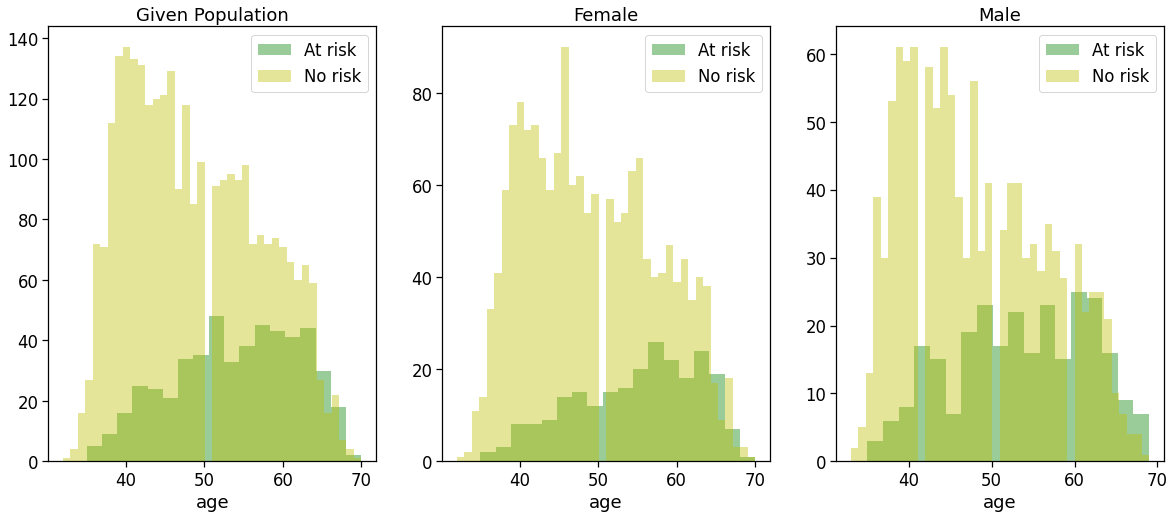

In [358]:
at_risk = "At risk"
no_risk= "No risk"
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='g',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='y',kde=False)
ax.legend()
ax.set_title("Given Population")
women= df[df['sex']==0]
men= df[df['sex']==1]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='g',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='y',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[2],color='g',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[2],color='y',kde=False)
ax.legend()
ax.set_title("Male")

## **Inference:**

We can infer the below from the above graphs:

* **Both women and men lying in Age group of 50 and above have high risk of heart disease.**

* **Men above 45 years are usually at risk, where as women above 55 years are usually at risk.**

* **Men are more likely to have heart disease compared to women.**

### **Which gender is prone to coronary heart disease?**

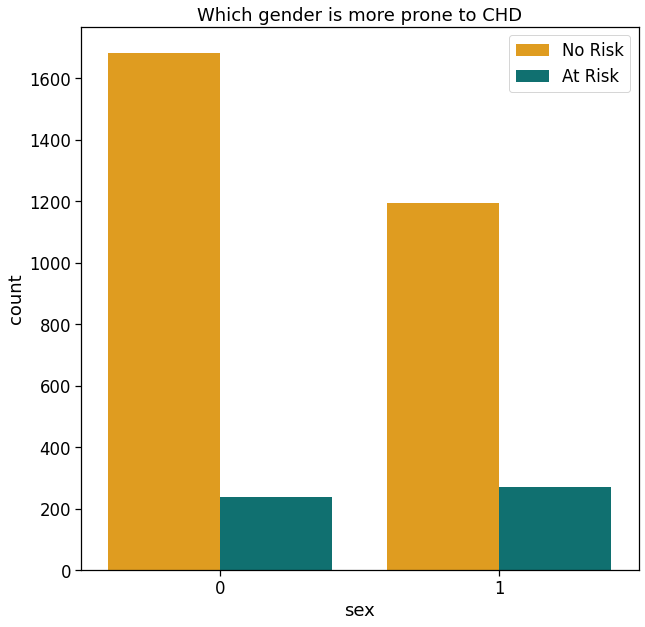

In [359]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

### **Are smokers at more risk of coronary heart disease ??**

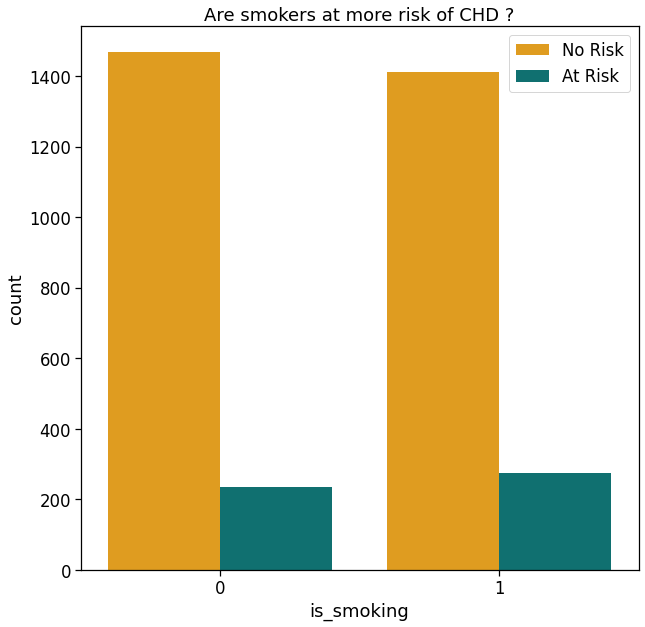

In [360]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['is_smoking'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are smokers at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

## **Age & Smoking v/s Risk**

Text(0.5, 1.0, 'NonSmokers')

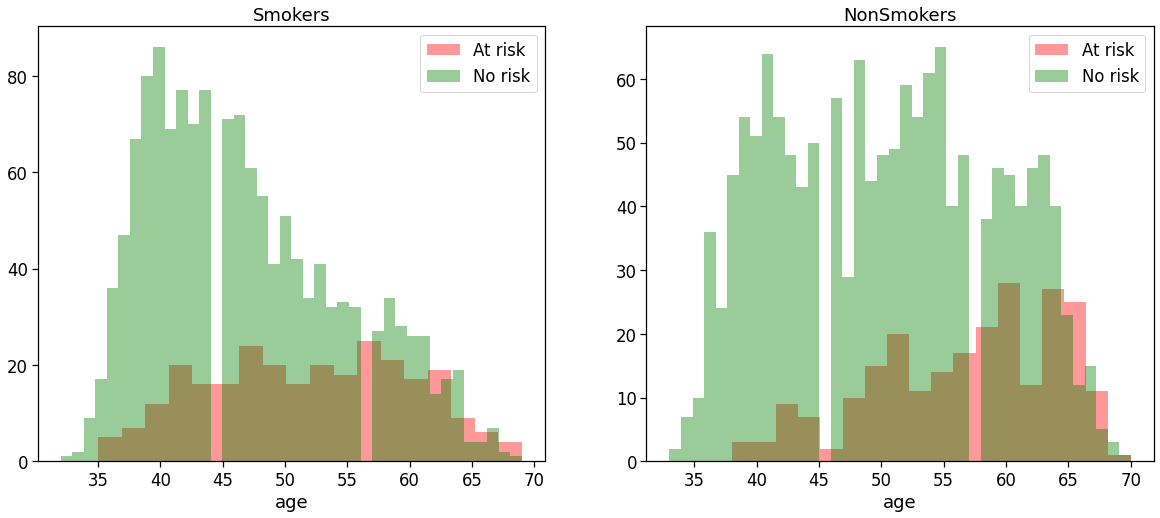

In [361]:
at_risk = "At risk"
no_risk= "No risk"
smoking= df[df['is_smoking']==1]
non_smoking= df[df['is_smoking']==0]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax= sns.distplot(smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("NonSmokers")

## **Inference:**

* **Age clearly plays an important role irrespetive of smoking or not, which is clearly evident from the above two plots.**

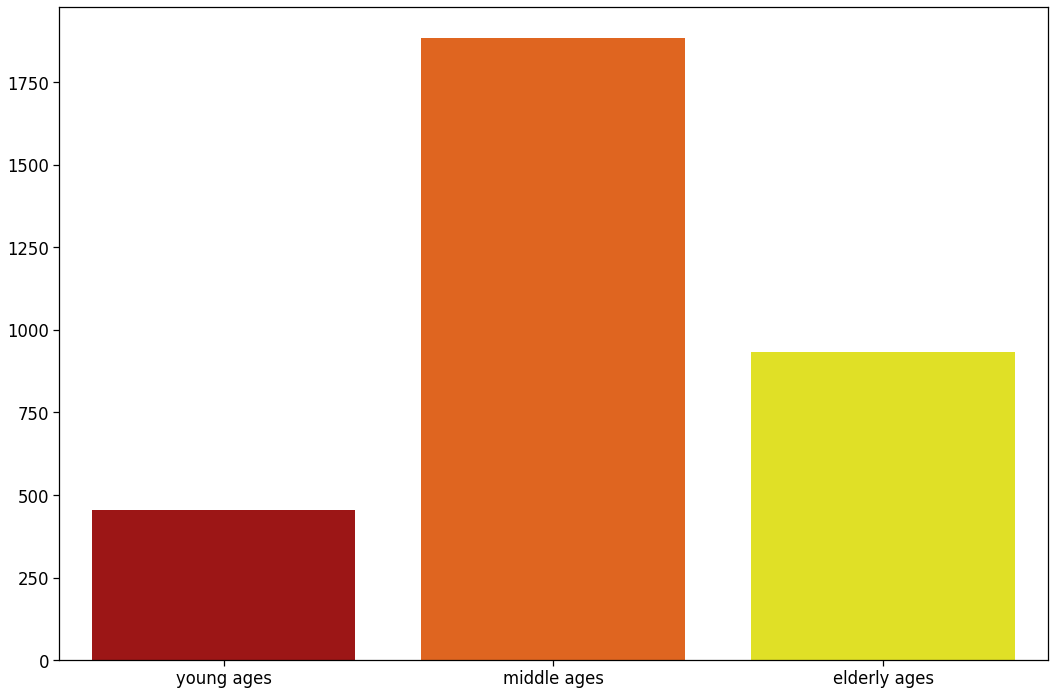

In [362]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(15,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)], palette='hot')
plt.tight_layout()

### **Which Age group is more vulnerable to coronary heart disease ?**

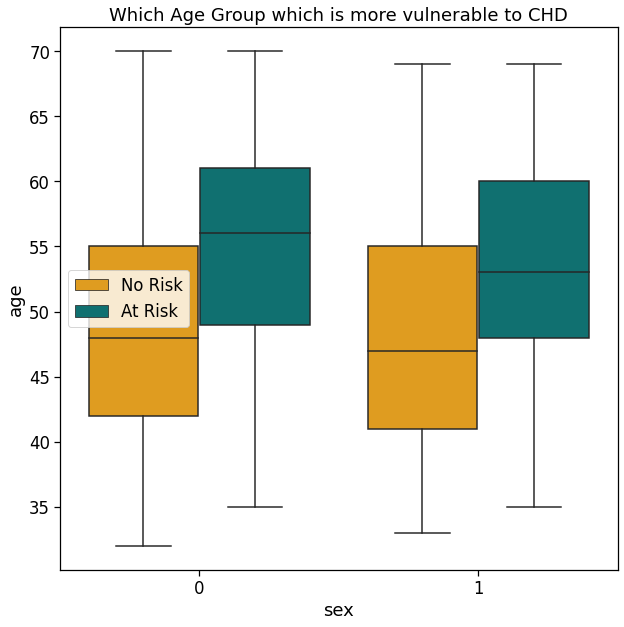

In [363]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = df['sex'], y = df['age'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

## **CigsPerDay & Sex v/s Risk**

In [364]:
df['is_smoking'].unique()

array([1, 0])

In [365]:
df['cigsPerDay']=df['cigsPerDay'].astype(int)

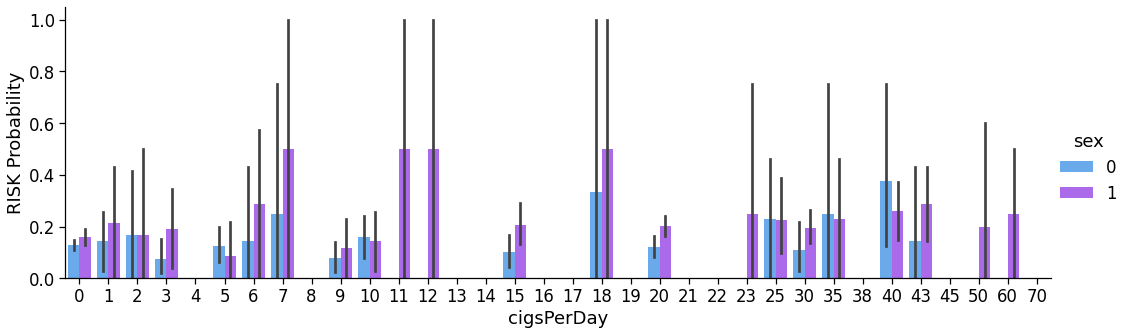

In [366]:
g=sns.factorplot('cigsPerDay','TenYearCHD',kind='bar',
                    data=df,hue='sex',aspect=3, palette="cool")
g=g.set_ylabels("RISK Probability")

## **Inference:**

**1. It is very difficult to say, if consumption of less or no cigarettes mean lower risk levels.**

**2. Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers.**

### **Are diabetic patients at more risk of coronary heart disease ??**

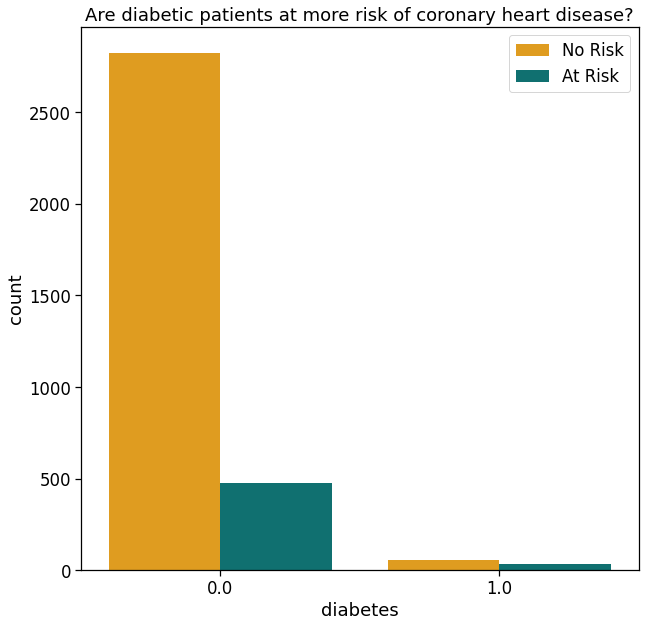

In [367]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

## **Diabetes & Age v/s Risk**

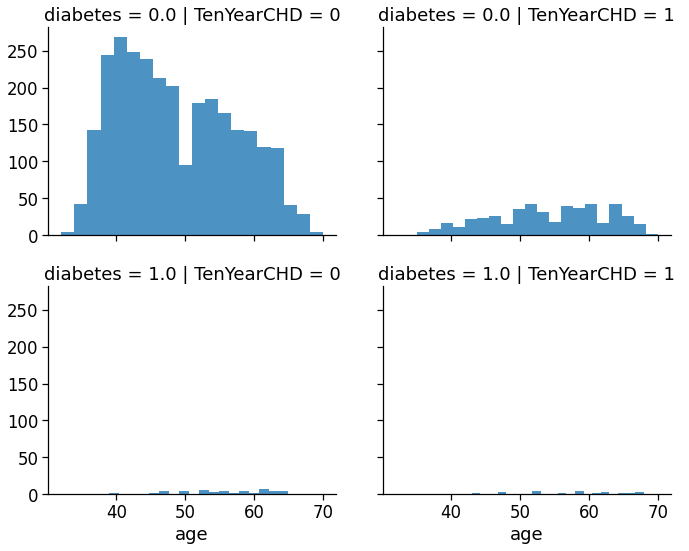

In [368]:
grid= sns.FacetGrid(df,col='TenYearCHD',row='diabetes',size=4,aspect=1.2)
grid.map(plt.hist,'age',alpha=.8,bins=20)
grid.add_legend();

## **Inference:**

**1. Non-Diabetic - Lesser risk of CHD.**

**2. Diabetic - Higher risk of CHD.**

### **Are hypertensive patients at more risk of coronary heart disease ??**

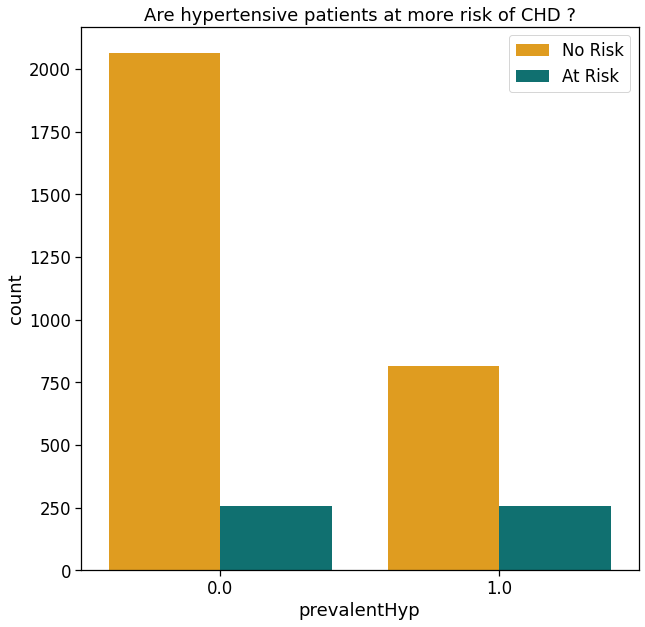

In [369]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

### **Are patients with blood pressure on medication at more risk of coronary heart disease ??**

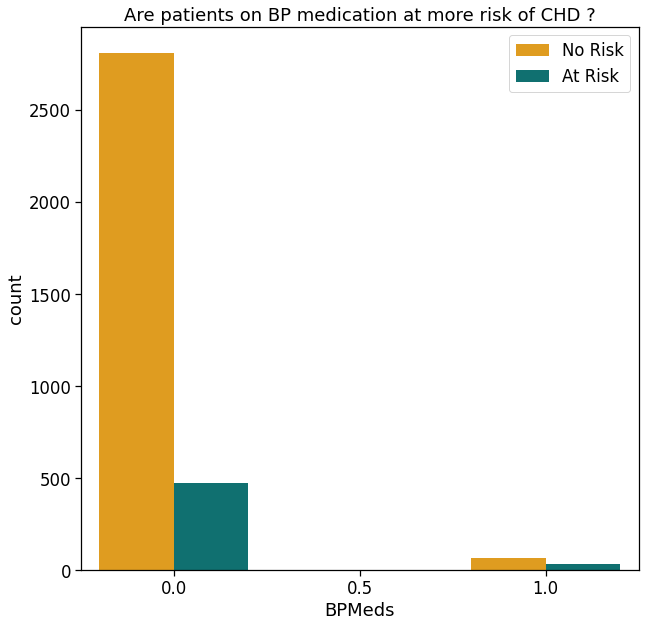

In [370]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

### **Are Total Cholestrol levels related to coronary heart disease ??**

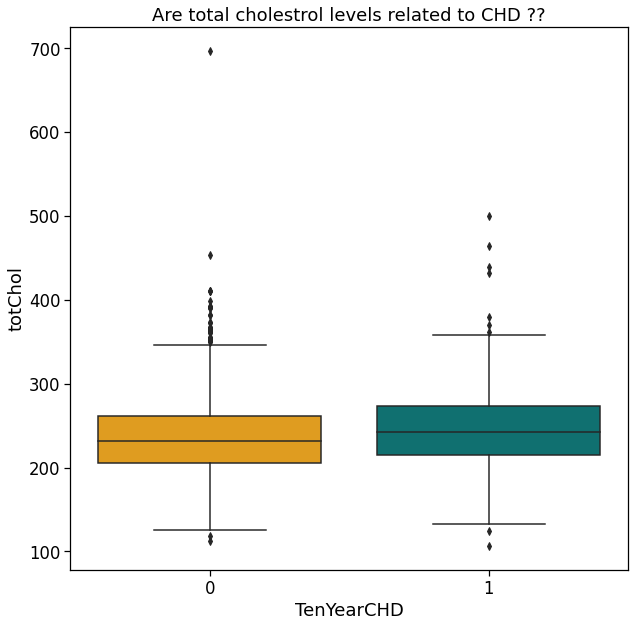

In [371]:
plt.figure(figsize = (10,10))
sns.boxplot(df['TenYearCHD'], df['totChol'], palette = my_palette)
plt.title("Are total cholestrol levels related to CHD ??")
plt.show()

**This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.**

### **Whether a person who had a stroke earlier more prone to CHD?**

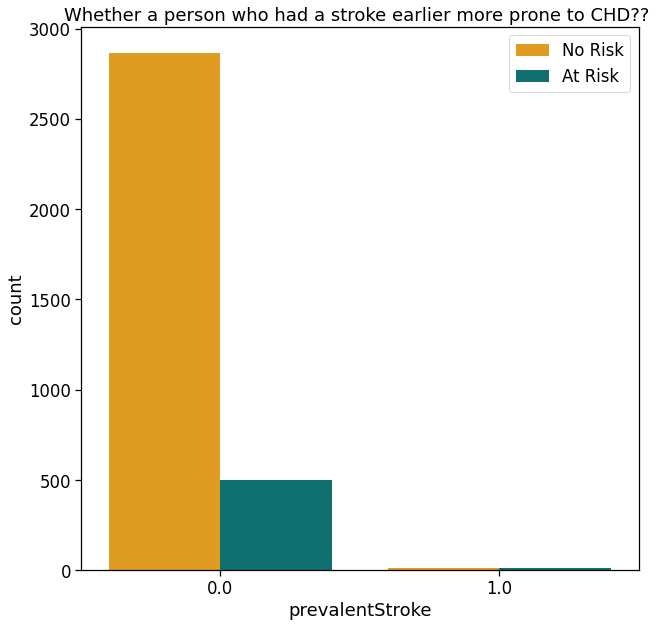

In [372]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

## **Data Splitting, Training & Modelling**

### **Data Splitting**

In [373]:
# Let us make a copy
new_df = df.copy()

In [374]:
new_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
0,64.0,2.0,0,1,3,0.0,0.0,0.0,0.0,221.0,31.47,90.0,80.0,1,116.50
1,36.0,4.0,1,0,0,0.0,0.0,1.0,0.0,212.0,29.77,72.0,75.0,0,133.00
2,46.0,1.0,0,1,10,0.0,0.0,0.0,0.0,250.0,20.35,88.0,94.0,0,93.50
3,50.0,1.0,1,1,20,0.0,0.0,1.0,0.0,233.0,28.26,68.0,94.0,1,123.00
4,64.0,1.0,0,1,30,0.0,0.0,0.0,0.0,241.0,26.42,70.0,77.0,0,110.75


In [375]:
# Let us now split
X = new_df.drop(['TenYearCHD'], axis=1)
y = new_df['TenYearCHD']

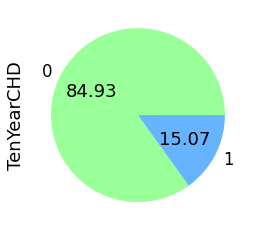

In [376]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f',colors = ['#99ff99','#66b3ff'])

**As per the above plot our target feature i.e., TenYearCHD, the risk rate is relatively rare, only 15% of the people have this disease.**

**Hence even if our model gives 94% accuracy! It is misleading.**

**All those non-risk cases, we’d have 100% accuracy. Those cases in which a person has a risk, we’d have 0% accuracy.**

**Hence our Evaluation Metrics for class imbalance problems (especiallly health data) would be RECALL, ROC SCORE.**


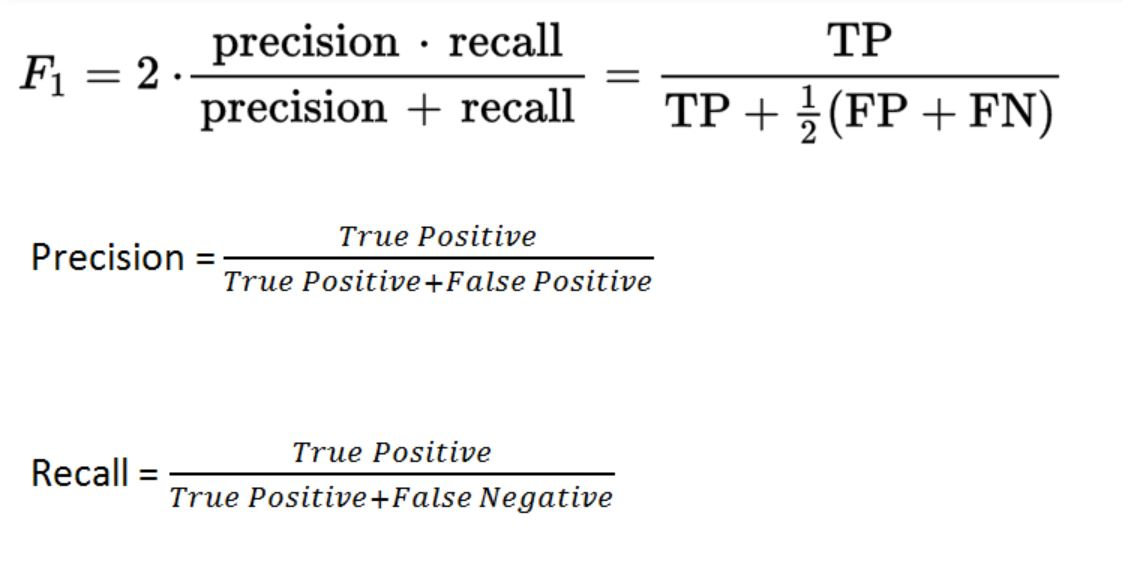


## **Handling Imbalance Data**

The two mostly commonly used methods for handling class imbalance are:

**1. Undersampling the majority class**

**2. Oversampling the minority class**

Oversampling can be defined as adding more copies to the minority class. It can be a good choice when you do not have a tonne of data to work with.

Disadvantage of undersampling is that it can cause loss of information and poor generalization to your test set.

## **SMOTE:**

In order to reduce overfitting during oversampling, synthetic sampling is used. SMOTE (Synthetic Minority Over Sampling Technique) is one popular algorithm. Instead of using copies of observations to oversample, SMOTE varies attributes of the observations to create new synthetic samples. Hence we choosed SMOTE Method for our data.



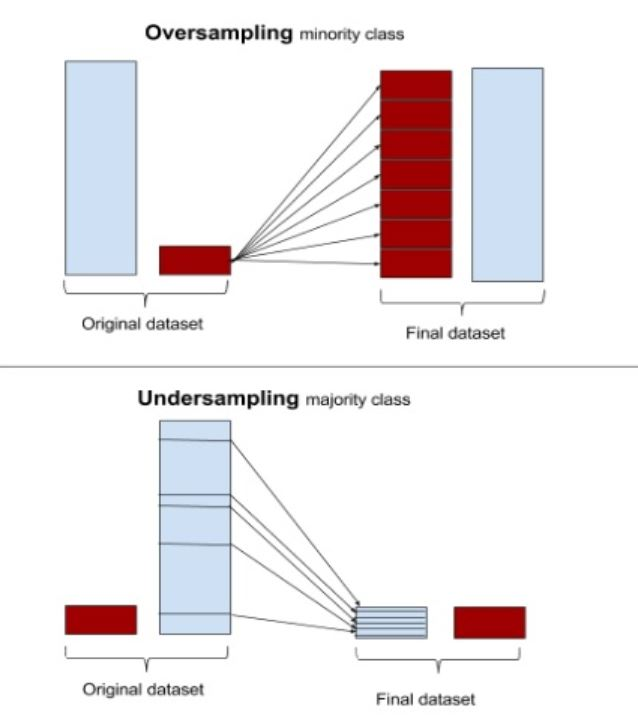

In [377]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(new_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [378]:
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

In [379]:
y_resampled.value_counts()

TenYearCHD
0             2879
1             2879
dtype: int64

### **Data** is now balanced

## **Standardization**

In [380]:
# Performing Standardization
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)

In [381]:
X = pd.DataFrame(X,columns= (new_df.drop(['TenYearCHD'], axis=1).columns))

## **Data Modelling & Training**

We use the following different machine learning models for the dataset:

1. Logistic Regression

2. K-Nearest Neighbour Classifier

3. XGboost Classifier

4. Decision Tree Classifier

5. Random Forest Classifier

6. Support Vector Machine

In [382]:
# Importing all the essesntial Libraries.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

In [383]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.3,stratify = y_resampled, random_state=0)

## **Logistic Regression**

In [384]:
# create and train logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [385]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 0.58310942,  0.01518037, -0.27574173, -0.33678915,  0.7688562 ,
         0.03173136,  0.122392  ,  0.01942926, -0.05799545,  0.11586796,
         0.00687104, -0.12195214,  0.26738813,  0.33752048]])

In [386]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [387]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6694789081885856
The accuracy on test data is  0.6747685185185185


[[1338  677]
 [ 655 1360]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

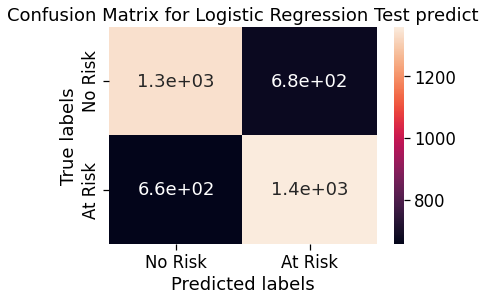

In [388]:
# Get the confusion matrix for train
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[585 279]
 [283 581]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

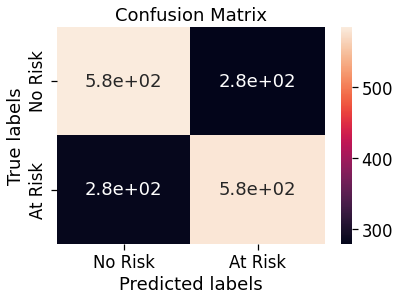

In [389]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [390]:
#Performance Metrics
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions= lr.predict(X_test)

lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test)
lr_recall= recall_score(lr_predictions,y_test)
lr_f1_score= f1_score(lr_predictions, y_test)

print('Performance of Logistic Regression Classifier')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Logistic Regression Classifier
Accuracy : 0.6747685185185185
Precision : 0.6724537037037037
Recall : 0.6755813953488372
F1 Score : 0.6740139211136892


<Figure size 1080x576 with 0 Axes>

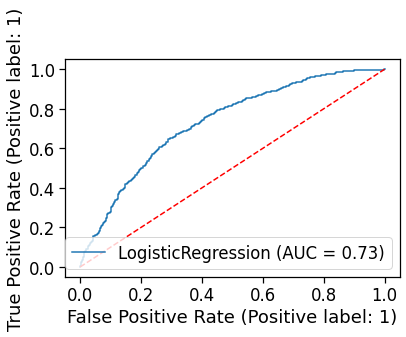

In [391]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## **K-Nearest Neighbor**

In [392]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predictions= knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)
knn_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN Classifier')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

Performance of KNN Classifier
Accuracy : 0.7783564814814815
Precision : 0.8680555555555556
Recall : 0.7360157016683022
F1 Score : 0.7966011683483802


<Figure size 1080x576 with 0 Axes>

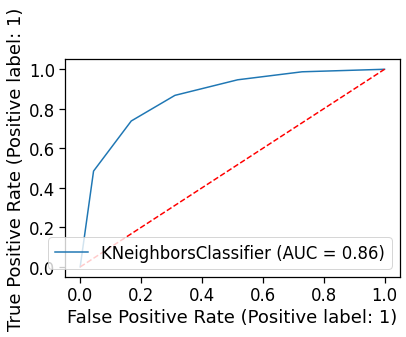

In [393]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## **Hyper-Parameter tuning for K-Nearest Neighbor**

In [394]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',return_train_score = False,verbose=1)
  

grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [395]:
# The Best Parameters
print('Best Parameters:', grid_search_knn.best_estimator_.get_params())

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [396]:
knn_predictions= grid_search_knn.predict(X_test)

#Performance Metrics
knn1_accuracy= accuracy_score(knn_predictions,y_test)
knn1_precision= precision_score(knn_predictions,y_test)
knn1_recall= recall_score(knn_predictions,y_test)
knn1_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN')
print('Accuracy :' , knn1_accuracy)
print('Precision :', knn1_precision)
print('Recall :', knn1_recall)
print('F1 Score :', knn1_f1_score)

Performance of KNN
Accuracy : 0.8344907407407407
Precision : 0.9270833333333334
Recall : 0.7822265625
F1 Score : 0.8485169491525423


<Figure size 1080x576 with 0 Axes>

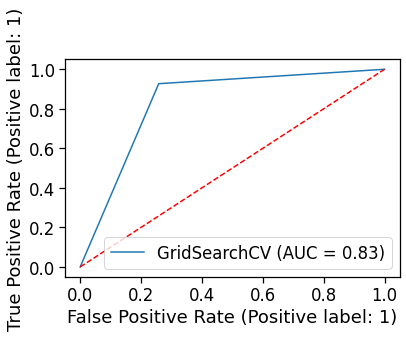

In [397]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## **Inference:**

**before hyperparameter tuning:**

1. AUC = 86%

2. Precision = 89%

3. Recall = 72%

4. F1 Score = 80%

**after hyperparameter tuning:**

1. AUC = 83%

2. Precision = 92%

3. Recall = 78%

4. F1 Score = 84%

**Hence though AUC got reduced,Precision,Recall and F1 Score has incresed**

## **XG Boost Classifier**

In [398]:
import xgboost as xgb
from sklearn import tree
#using XGBoost
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)


In [399]:
xg_cla.fit(X_test,y_test)

XGBClassifier(alpha=10, colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
              n_estimators=10)

In [400]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [401]:
accuracy_score(y_train,train_preds)

0.8074441687344913

In [402]:
accuracy_score(y_test,test_preds)

0.9461805555555556

In [403]:
roc_auc_score(y_test,test_preds)

0.9461805555555556

In [404]:
roc_auc_score(y_train,train_preds)

0.8074441687344913

[[1662  353]
 [ 423 1592]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

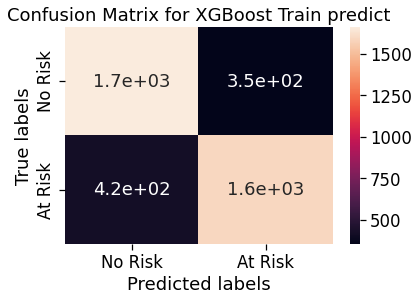

In [405]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[821  43]
 [ 50 814]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

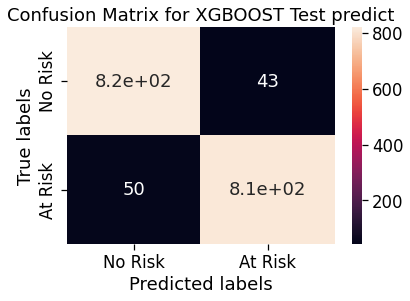

In [406]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [407]:
xgb_c= xgb.XGBClassifier()
xg_cla.fit(X_train,y_train)
xgb_predictions= knn.predict(X_test)

#Performance Metrics
xgb_accuracy= accuracy_score(y_test,test_preds)
xgb_precision= precision_score(y_test,test_preds)
xgb_recall= recall_score(y_test,test_preds)
xgb_f1_score= f1_score( y_test,test_preds)

print('Performance of XGBoost Classifier')
print('Accuracy :' , xgb_accuracy)
print('Precision :', xgb_precision)
print('Recall :', xgb_recall)
print('F1 Score :', xgb_f1_score)

Performance of XGBoost Classifier
Accuracy : 0.9461805555555556
Precision : 0.9498249708284714
Recall : 0.9421296296296297
F1 Score : 0.9459616502033701


## **Decision Tree**

**Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.**

In [408]:
from sklearn.tree import DecisionTreeClassifier
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

In [409]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [410]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) 
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) 
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 0.7575231481481481
the training accuracy is 0.7903225806451613


[[1657  358]
 [ 487 1528]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

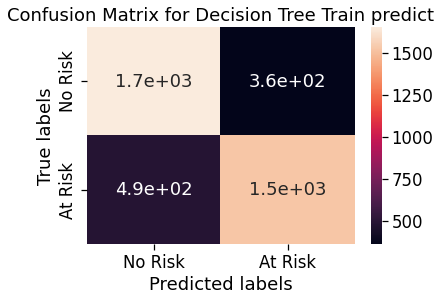

In [411]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[673 191]
 [228 636]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

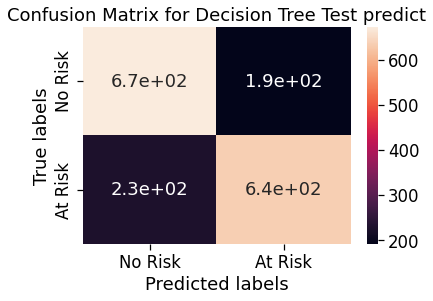

In [412]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [413]:
decision_tree_model= DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)
decision_tree_model = decision_tree_model.predict(X_test)

#Performance Metrics
dt_accuracy= accuracy_score(y_test,test_preds)
dt_precision= precision_score(y_test,test_preds)
dt_recall= recall_score(y_test,test_preds)
dt_f1_score= f1_score( y_test,test_preds)

print('Performance of Decision tree Classifier')
print('Accuracy :' , dt_accuracy)
print('Precision :', dt_precision)
print('Recall :', dt_recall)
print('F1 Score :', dt_f1_score)

Performance of Decision tree Classifier
Accuracy : 0.7575231481481481
Precision : 0.7690447400241838
Recall : 0.7361111111111112
F1 Score : 0.7522176227084565


## **Building Ensembles of Decision Tree**

In [414]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')


In [415]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [416]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [417]:
accuracy_score(y_train,train_preds)

0.9975186104218362

In [418]:
accuracy_score(y_test,test_preds)

0.8998842592592593

In [419]:
roc_auc_score(y_test,test_preds)

0.8998842592592593

In [420]:
roc_auc_score(y_train,train_preds)

0.9975186104218362

[[2008    7]
 [   3 2012]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

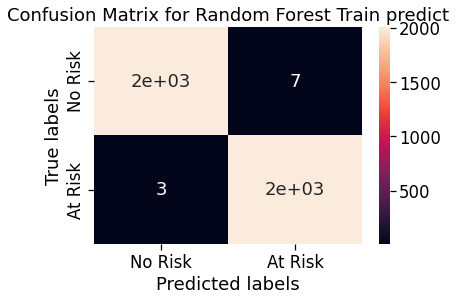

In [421]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[796  68]
 [105 759]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

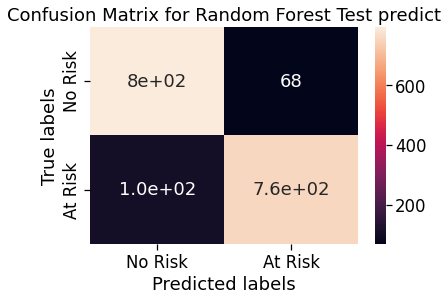

In [422]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [423]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
classifier = classifier.predict(X_test)

#Performance Metrics
rf_accuracy= accuracy_score(y_test,test_preds)
rf_precision= precision_score(y_test,test_preds)
rf_recall= recall_score(y_test,test_preds)
rf_f1_score= f1_score( y_test,test_preds)

print('Performance of Randomforest Classifier')
print('Accuracy :' , rf_accuracy)
print('Precision :', rf_precision)
print('Recall :', rf_recall)
print('F1 Score :', rf_f1_score)

Performance of Randomforest Classifier
Accuracy : 0.8998842592592593
Precision : 0.9177750906892382
Recall : 0.8784722222222222
F1 Score : 0.8976936723832053


## **Support Vector Machine**

In [424]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train,y_train)
svm_predictions= svm.predict(X_test)

#Performance Metrics
svm_accuracy= accuracy_score(svm_predictions,y_test)
svm_precision= precision_score(svm_predictions,y_test)
svm_recall= recall_score(svm_predictions,y_test)
svm_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier')
print('Accuracy :' , svm_accuracy)
print('Precision :', svm_precision)
print('Recall :', svm_recall)
print('F1 Score :', svm_f1_score)

Performance of Support Vector Machine Classifier
Accuracy : 0.7378472222222222
Precision : 0.7905092592592593
Recall : 0.7151832460732984
F1 Score : 0.7509620670698185


<Figure size 1080x576 with 0 Axes>

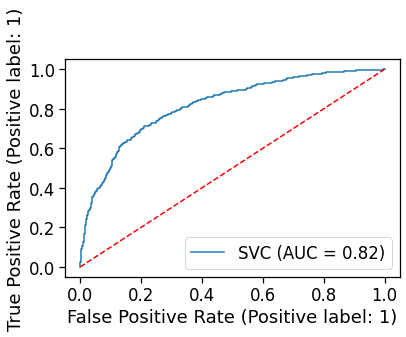

In [425]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## **Hyper-Parameter Tuning for Support Vector Machine**

In [426]:
kernel = ['rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search_svm.fit(X_train, y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


In [427]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.799819 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [428]:
svm_predictions= grid_search_svm.predict(X_test)

# #Performance Metrics
svm1_accuracy= accuracy_score(svm_predictions,y_test)
svm1_precision= precision_score(svm_predictions,y_test)
svm1_recall= recall_score(svm_predictions,y_test) 
svm1_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier after hyperparameter tuning')
print('Accuracy :' , svm1_accuracy)
print('Precision :', svm1_precision)
print('Recall :', svm1_recall)
print('F1 Score :', svm1_f1_score)

Performance of Support Vector Machine Classifier after hyperparameter tuning
Accuracy : 0.8107638888888888
Precision : 0.8344907407407407
Recall : 0.7966850828729282
F1 Score : 0.8151498021481062


<Figure size 1080x576 with 0 Axes>

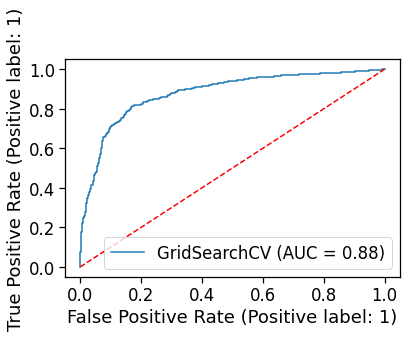

In [429]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## **Inference:**

**We can see a good increase in the performance of Recall, F1_Score, AUC_Score.**

## **Comparing the performance of all the models**

In [ ]:
#Comparing Performance of all classifiers

# models = pd.DataFrame({
#     'Model': ['Decision Tree', 'Support Vector Machines','SVM with hyperparameter tuning' 'K Nearest Neighbour', 'KNN with hyperparameter tuning', 'Logistic Regression','Random Forest', 'XGBoost'],
#     'Accuracy': [dt_accuracy, svm_accuracy, svm1_accuracy, knn_accuracy,knn1_accuracy, lr_accuracy,rf_accuracy, xgb_accuracy],
#     'Precision': [dt_precision, svm_precision, svm1_precision, knn_precision,knn1_precision, lr_precision,rf_precision, xgb_precision],
#     'Recall': [dt_recall, svm_recall,svm1_recall, knn_recall,knn1_recall, lr_recall,rf_recall, xgb_recall],
#     'F1 Score': [dt_f1_score, svm_f1_score, svm1_f1_score, knn_f1_score, knn1_f1_score, lr_f1_score, rf_f1_score, xgb_f1_score]})

# models.sort_values(by='Accuracy', ascending=False)

In [432]:
# creating a list of all model names

# model_list = ['Decision Tree', 'Support Vector Machines','SVM with hyperparameter tuning' 'K Nearest Neighbour', 'KNN with hyperparameter tuning', 'Logistic Regression','Random Forest', 'XGBoost']

In [433]:
#Comparing Performance of all classifiers

# result_accuracy = [dt_accuracy, svm_accuracy, svm1_accuracy, knn_accuracy, knn1_accuracy, lr_accuracy, rf_accuracy, xgb_accuracy]

# result_precision = [dt_precision, svm_precision, svm1_precision, knn_precision, knn1_precision, lr_precision, rf_precision, xgb_precision]

# result_recall = [dt_recall, svm_recall,svm1_recall, knn_recall, knn1_recall, lr_recall, rf_recall, xgb_recall]

# result_f1_score = [dt_f1_score, svm_f1_score, svm1_f1_score, knn_f1_score, knn1_f1_score, lr_f1_score, rf_f1_score, xgb_f1_score]

In [435]:
# creating an empty dataframe

# performances_df = pd.DataFrame()

In [ ]:
# adding above lists to the empty dataframe

# performances_df['model name'] = model_list
# performances_df['accuracy'] = result_accuracy
# performances_df['precision'] = result_precision
# performances_df['recall'] = result_recall
# performances_df['f1_score'] = result_f1_score